In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# sns.set()
%matplotlib inline

# Finding boundaries

Say you want to analyse a population that is separated into known classes.

Within that population, you want to focus on the _borderline_ elements, i.e.
those data points that belong to one class, but could (according to
some given measure) be assigned to another class, if they were just
a little bit different.

How do you approach this problem?

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

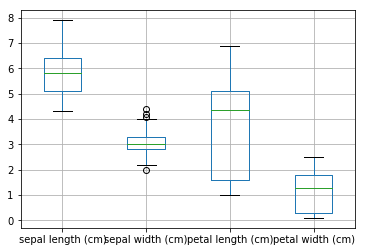

In [8]:
iris = load_iris()
pd.DataFrame(iris.data, columns=iris.feature_names).boxplot()

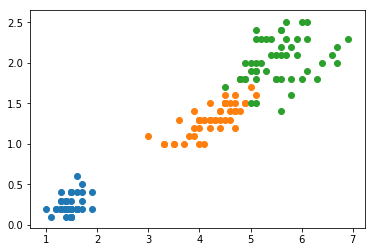

In [85]:
X = iris.data
unique_target = set(iris.target)
for l in unique_target:
    myfilter = (iris.target == l)
    plt.scatter(X[myfilter, 2], X[myfilter, 3])

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_jobs=-1, verbose=1)

In [92]:
y = iris.target

In [93]:
clf_rf.fit(X, y)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 2 

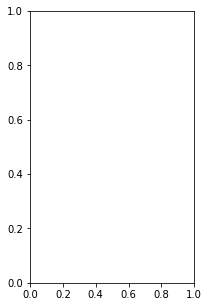

In [82]:
# Plot fit with iris data
plt.figure(figsize=(10,5))
model = clf_rf
n_classes = 3
n_estimators = 30
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 42  # fix the seed on each iteration
for i, pair in enumerate(([0, 1], [0, 2], [2, 3])):
    # We only take the two corresponding features
        plt.subplot(1, 3, i+1)
        X = iris.data[:, pair]
        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        estimator_alpha = 1.0 / len(model.estimators_)
        for tree in model.estimators_:
#             pass
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
#             Z = Z.reshape(xx.shape)
#             cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                        cmap=cmap)



In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf_rf.predict(X))

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  1, 49]])

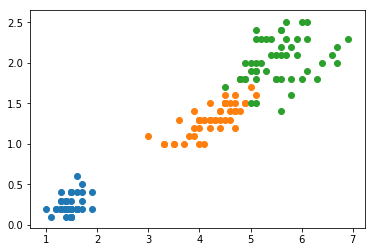

In [101]:
unique_target = set(iris.target)
for l in unique_target:
    myfilter = (iris.target == l)
    plt.scatter(X[myfilter, 2], X[myfilter, 3])

In [102]:
clf_rf.predict_proba(X)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
 